# Machine Learning

Importing Variables

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import datetime
import sklearn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

Import Dataframe

In [2]:
df = pd.read_csv('df_main.csv')

In [3]:
df.head()

,Area,Item,Year,Export Quantity,Export Value,Import Quantity,Import Value,Export Unit Price (USD),import Unit Price (USD)
0,Belgium,Mushrooms and truffles,2000,23198.0,34246.0,5252.0,11328.0,1476.247952,2156.892612
1,Belgium,Mushrooms and truffles,2001,29201.0,37788.0,7135.0,15176.0,1294.065272,2126.979678
2,Belgium,Mushrooms and truffles,2002,28034.0,41794.0,6116.0,15633.0,1490.832560,2556.082407
3,Belgium,Mushrooms and truffles,2003,25688.0,45242.0,11474.0,22121.0,1761.211461,1927.924002
4,Belgium,Mushrooms and truffles,2004,28234.0,57678.0,17494.0,27910.0,2042.856131,1595.404139


Separating the data per country

In [6]:
Ireland = df.loc[df['Area']== 'Ireland']
Netherlands = df.loc[df['Area']== 'Netherlands']
Belgium = df.loc[df['Area']== 'Belgium']

In [22]:
eprice = 'Export Unit Price (USD)'

def title(title):
    plt.title(f'{title}', fontdict={'fontsize':18},    pad=14);

Line plot

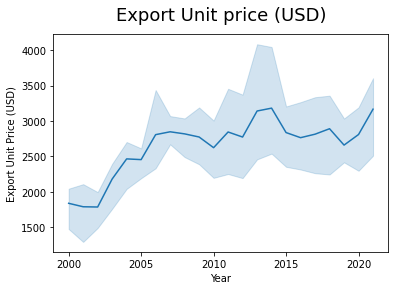

In [27]:
sns.lineplot(data = df, x = 'Year', y = eprice);
title('Export Unit price (USD)')

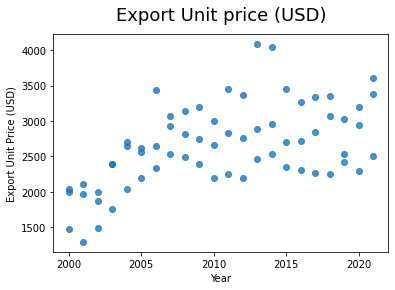

In [26]:
sns.regplot(x="Year", y=eprice, data=df, fit_reg=False)
title('Export Unit price (USD)')

I want to predict the Export Unit price in USD based on my Sample data, for this I will be using a series of predictive models

#### Linear Regression

In [34]:
X = df['Year']
y = df[eprice]

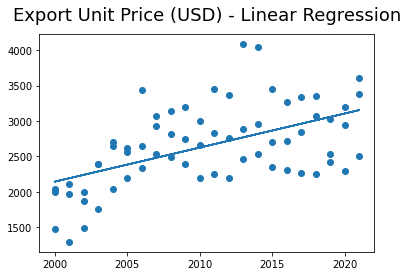

In [31]:
slope, intercept, r, p, std_err = stats.linregress(X, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X))

plt.scatter(X, y)
plt.plot(X, mymodel)
title(f'{eprice} - Linear Regression');
plt.show()

In [35]:
X1 = Ireland['Year']
y1 = Ireland[eprice]

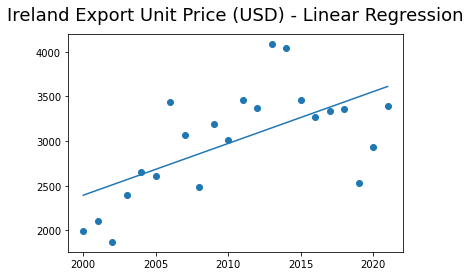

In [37]:
slope, intercept, r, p, std_err = stats.linregress(X1, y1)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X1))

plt.scatter(X1, y1)
plt.plot(X1, mymodel)
title(f'Ireland {eprice} - Linear Regression');
plt.show()

#### Polinomial Regression

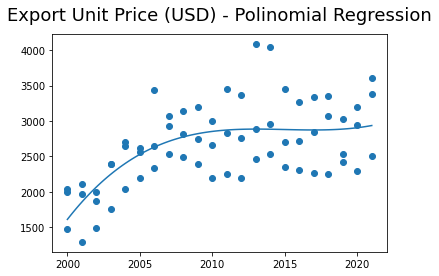

In [42]:
polymodel = np.poly1d(np.polyfit(X, y, 3))

polyline = np.linspace(2000, 2021, 100)

plt.scatter(X, y)
plt.plot(polyline, polymodel(polyline))
title(f'{eprice} - Polinomial Regression');
plt.show()

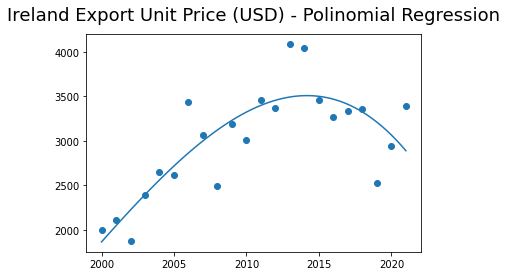

In [43]:
polymodel = np.poly1d(np.polyfit(X1, y1, 3))

polyline = np.linspace(2000, 2021, 100)

plt.scatter(X1, y1)
plt.plot(polyline, polymodel(polyline))
title(f'Ireland {eprice} - Polinomial Regression');
plt.show()

#### Preparing the data for the models

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)

In [48]:
# X_train, X_test, y_train, y_test

In [49]:
# X1_train, X1_test, y1_train, y1_test

In [92]:
X_train = X_train.array.reshape(-1, 1)
X_test = X_test.array.reshape(-1, 1)

In [63]:
X1_train = X1_train.array.reshape(-1, 1)
X1_test = X1_test.array.reshape(-1, 1)

In [93]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

#### Linear Regression model - all

In [60]:
lr = LinearRegression().fit(X_train, y_train);

Display the coefficient and intercept values

In [61]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [263.60698232]
lr.intercept_: 2680.503129033382


Display the score values by calling lr

In [62]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.21
Test set score: 0.60


#### Linear Regression model - Ireland

In [65]:
lr1 = LinearRegression().fit(X1_train, y1_train);

In [66]:
print("lr.coef_: {}".format(lr1.coef_))
print("lr.intercept_: {}".format(lr1.intercept_))

lr.coef_: [244.07376433]
lr.intercept_: 3054.942389752898


In [67]:
print("Training set score: {:.2f}".format(lr1.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(lr1.score(X1_test, y1_test)))

Training set score: 0.24
Test set score: 0.44


#### Polinomial Regression - all

In [68]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

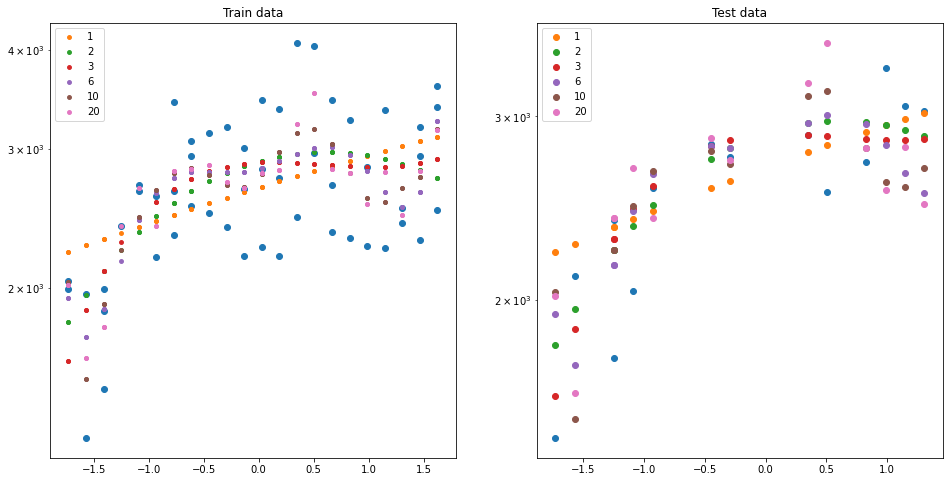

In [69]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
title("Train data - All")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
title("Test data - All")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [70]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.21, test score=0.6
Polynomial degree 2: train score=0.32, test score=0.74
Polynomial degree 3: train score=0.35, test score=0.73
Polynomial degree 6: train score=0.43, test score=0.53
Polynomial degree 10: train score=0.46, test score=0.32
Polynomial degree 20: train score=0.52, test score=0.04


#### Polinomial Regression - Ireland

In [71]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y1_train_pred = np.zeros((len(X1_train), len(degrees)))
y1_test_pred = np.zeros((len(X1_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X1_train, y1_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y1_train_pred[:, i] = model.predict(X1_train)
    y1_test_pred[:, i] = model.predict(X1_test)

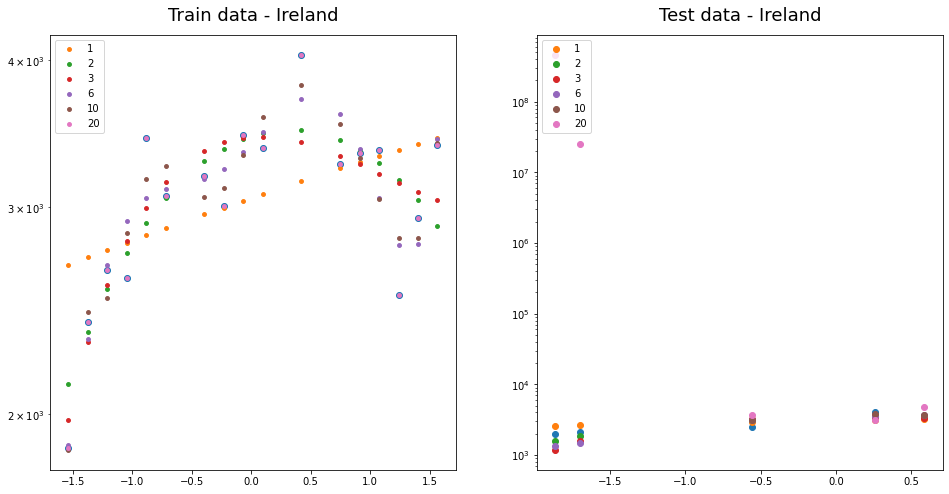

In [72]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X1_train, y1_train)
plt.yscale('log')
title("Train data - Ireland")
for i, degree in enumerate(degrees):    
    plt.scatter(X1_train, y1_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X1_test, y1_test)
plt.yscale('log')
title("Test data - Ireland")
for i, degree in enumerate(degrees):    
    plt.scatter(X1_test, y1_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [73]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y1_train, y1_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y1_test, y1_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.24, test score=0.44
Polynomial degree 2: train score=0.64, test score=0.68
Polynomial degree 3: train score=0.66, test score=0.41
Polynomial degree 6: train score=0.83, test score=0.53
Polynomial degree 10: train score=0.86, test score=-357.29
Polynomial degree 20: train score=1.0, test score=-64859052424.77


#### Ridge Regression - All 

Alpha 1

In [74]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.21
Test set score: 0.59


Alpha 10

In [75]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.20
Test set score: 0.53


In [76]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.21
Test set score: 0.60


#### Ridge Regression - Ireland

In [77]:
#Alpha 1
ridge = Ridge().fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(ridge.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(ridge.score(X1_test, y1_test)))

Training set score: 0.24
Test set score: 0.42


In [78]:
#Alpha 10
ridge10 = Ridge(alpha = 10).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(ridge10.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(ridge10.score(X1_test, y1_test)))

Training set score: 0.21
Test set score: 0.28


In [79]:
#Alpha 0.1
ridge01 = Ridge(alpha=0.1).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(ridge01.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(ridge01.score(X1_test, y1_test)))

Training set score: 0.24
Test set score: 0.44


#### Lasso Regression - All

In [80]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.21
Test set score: 0.60
Number of features used: 1


#### Lasso Regression - Ireland

In [81]:
lasso = Lasso().fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(lasso.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(lasso.score(X1_test, y1_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.24
Test set score: 0.44
Number of features used: 1


#### Testing Models
